In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Just a simple convenience function to send the internal python
# logs to stdout.  Definitely not required
from whylogs.logs import display_logging
display_logging('debug')

2020-09-22 16:47:19,276 - whylogs.logs - DEBUG - whylogs.logs logging -> stdout at level DEBUG


## Load data

In [3]:
# Load some data
df = pd.read_csv('lending_club_1000.csv')
# Split into a test & training set
df_training = df.sample(int(len(df) * 0.8), replace=False, random_state=123)
df_test = df.drop(df_training.index)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,90671227,NaN,4800.0,4800.0,4800.0,36 months,13.49,162.87,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,90060135,NaN,21600.0,21600.0,21600.0,60 months,9.49,453.54,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,90501423,NaN,24200.0,24200.0,24200.0,36 months,9.49,775.09,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,90186302,NaN,3600.0,3600.0,3600.0,36 months,11.49,118.70,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,90805192,NaN,8000.0,8000.0,8000.0,36 months,10.49,259.99,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Log dataset sketches

In [4]:
from whylogs import get_or_create_session

session = get_or_create_session()

2020-09-22 16:47:19,339 - whylogs.app.config - DEBUG - Attempting to load config file: None
2020-09-22 16:47:19,340 - whylogs.app.config - DEBUG - Attempting to load config file: .whylogs.yaml


#### Log dataframe

In [5]:
session.log_dataframe(df_training, 'training.data')
# Then you could do whatever training or calculations you'd like

### Inspect profiles/statistics

In [6]:
# You can also capture the logger response and interact with the generated
# profiles

# Log the test data
prof = session.log_dataframe(df_test, 'test.data')
summary = prof.flat_summary()
stats_df = summary['summary']
stats_df

,column,count,null_count,bool_count,numeric_count,max,mean,min,stddev,nunique_numbers,...,ununique_str_upper,quantile_0.0000,quantile_0.0100,quantile_0.0500,quantile_0.2500,quantile_0.5000,quantile_0.7500,quantile_0.9500,quantile_0.9900,quantile_1.0000
0,num_il_tl,200.0,0.0,0.0,199.0,43.00,9.834171,0.00,8.290657,34.0,...,0.0,0.00,0.000000,1.000000,4.000000,7.000000,14.000000,28.000000,42.000000,43.000000
1,open_acc_6m,200.0,0.0,0.0,199.0,8.00,1.356784,0.00,1.420749,8.0,...,0.0,0.00,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000,7.000000,8.000000
2,avg_cur_bal,200.0,0.0,0.0,199.0,72812.00,13079.467337,244.00,14001.002777,199.0,...,0.0,244.00,425.000000,1252.000000,3039.000000,8200.000000,17591.000000,43647.000000,68086.000000,72812.000000
3,dti_joint,200.0,0.0,0.0,4.0,20.65,14.892500,12.35,3.863922,4.0,...,0.0,12.35,12.350000,12.350000,13.220000,13.350000,20.650000,20.650000,20.650000,20.650000
4,num_accts_ever_120_pd,200.0,0.0,0.0,199.0,7.00,0.542714,0.00,1.229657,8.0,...,0.0,0.00,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,sec_app_collections_12_mths_ex_med,200.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,emp_length,200.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,last_pymnt_amnt,200.0,0.0,0.0,199.0,35304.76,5068.370452,0.00,7696.468449,194.0,...,0.0,0.00,7.980000,118.699997,334.100006,771.229980,7585.509766,22287.580078,32954.308594,35304.761719
149,total_pymnt_inv,200.0,0.0,0.0,199.0,52583.97,15089.057337,0.00,10349.878426,198.0,...,0.0,0.00,828.900024,2734.159912,7149.430176,12359.349609,20929.970703,35261.218750,51942.230469,52583.968750


<BarContainer object of 30 artists>

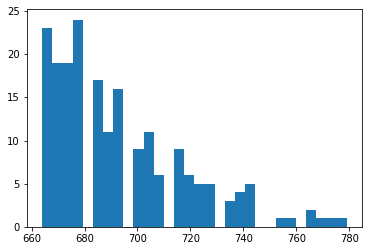

In [7]:
# See one of the inspected histograms
hist_data = summary['hist']['fico_range_high']
bins = hist_data['bin_edges']
n = hist_data['counts']
bin_width = np.diff(bins)

plt.bar(bins[0:-1], n, bin_width, align='edge')

## Load logged data

In [8]:
import glob

### Load flat table statistics

In [9]:
# Load the flat table statistics from the 'test.data' dataset
fnames = glob.glob('whylogs-output/test.data/dataset_summary/flat_table/dataset_summary*.csv')
fnames.sort()
# Load the most recent file
test_stats = pd.read_csv(fnames[-1])
test_stats

,column,count,null_count,bool_count,numeric_count,max,mean,min,stddev,nunique_numbers,...,ununique_str_upper,quantile_0.0000,quantile_0.0100,quantile_0.0500,quantile_0.2500,quantile_0.5000,quantile_0.7500,quantile_0.9500,quantile_0.9900,quantile_1.0000
0,funded_amnt,200.0,0.0,0.0,199.0,40000.00,16479.899497,1000.00,9811.384942,79.0,...,0.0,1000.000000,1000.000000,3325.000000,9600.00,15000.000000,23000.000000,35000.000000,40000.000000,40000.000000
1,mo_sin_rcnt_tl,200.0,0.0,0.0,199.0,46.00,6.195980,0.00,6.649735,26.0,...,0.0,0.000000,0.000000,0.000000,2.00,4.000000,8.000000,21.000000,35.000000,46.000000
2,open_il_12m,200.0,0.0,0.0,199.0,4.00,0.678392,0.00,0.845120,5.0,...,0.0,0.000000,0.000000,0.000000,0.00,0.000000,1.000000,2.000000,3.000000,4.000000
3,installment,200.0,0.0,0.0,199.0,1300.55,486.018090,34.96,283.607183,180.0,...,0.0,34.959999,36.150002,112.139999,271.75,413.000000,668.859985,1069.439941,1204.569946,1300.550049
4,bc_open_to_buy,200.0,0.0,0.0,198.0,88250.00,11172.843434,0.00,14448.281979,194.0,...,0.0,0.000000,0.000000,118.000000,2011.00,5719.000000,15374.000000,42950.000000,85587.000000,88250.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,num_rev_tl_bal_gt_0,200.0,0.0,0.0,199.0,18.00,5.979899,0.00,3.357428,19.0,...,0.0,0.000000,1.000000,2.000000,4.00,5.000000,8.000000,13.000000,17.000000,18.000000
147,last_pymnt_d,200.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,percent_bc_gt_75,200.0,0.0,0.0,198.0,100.00,40.382323,0.00,33.933261,26.0,...,0.0,0.000000,0.000000,0.000000,7.70,33.299999,66.699997,100.000000,100.000000,100.000000
149,debt_settlement_flag,200.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Load the full dataset profile sketch

In [10]:
from whylogs import DatasetProfile

# Load a dataset profile from the 'test.data' dataset
fnames = glob.glob('whylogs-output/test.data/dataset_profile/protobuf/*.bin')
fnames.sort()

test_prof = DatasetProfile.read_protobuf(fnames[-1], delimited_file=False)
test_prof

---

In [11]:
# Not necessary, but you can reset the WhyLogs session if you want
from whylogs import reset_default_session
reset_default_session()

2020-09-22 16:47:24,053 - whylogs.app.config - DEBUG - Attempting to load config file: None
2020-09-22 16:47:24,054 - whylogs.app.config - DEBUG - Attempting to load config file: .whylogs.yaml
